In [4]:
# Building the graph with nodes = 4
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection 
import numpy as np
import matplotlib.colors as colors
import qiskit_aer
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile, assemble
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram, array_to_latex, circuit_drawer 
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeWashingtonV2
from numpy import pi

In [5]:
def glowing_edges(pos, edges, colors):
    edge_pos = np.asarray([(pos[e[0]], pos[e[1]]) for e in edges]) 
    segments = [np.linspace(x[0], x[1], 25) for x in edge_pos]
    lc = LineCollection(segments, colors=colors, linewidths=3, alpha=0.4, zorder=2) 
    return lc
def generateNetworkFigure(nodeSize,figSize=10):
    cyberpunk_colors = ['#D4BFFF', '#F5C2FF', '#DE9DFF', '#B280FF'] 
    node_edge_colors = ['#D4BFFF', '#F5C2FF', '#DE9DFF', '#B280FF'] 
    color_map = mcolors.ListedColormap(cyberpunk_colors) 
    plt.style.use("white_background")
    figSize=10
    G = nx.DiGraph(directed=True)
    node_sizes = [800] * nodeSize
    edge_widths = [2]*nodeSize
    G = nx.complete_graph(nodeSize)
    pos = nx.random_layout(G, center=[0, 0])
    edges = G.edges()
    colors = ['#D4BFFF', '#F5C2FF', '#DE9DFF', '#B280FF'] 
    lc = glowing_edges(pos, edges, colors) 
    plt.gca().add_collection(lc) 
    dist_matrix=np.zeros((nodeSize,nodeSize))
    # Extract the values using a loop
    coordinates = []
    for key, value in pos.items(): 
        coordinates.append(value)
    coordinates = np.array(coordinates) 
    for i in range(nodeSize):
        for j in range(nodeSize):
            dist_matrix[i][j] = np.linalg.norm(coordinates[i]-coordinates[j])
    # for node, coords in pos.items():
    #     print(f"Node {node}: ({coords[0]}, {coords[1]})")
    # edge_labels = {(1, 2): '$\\phi_{2\\to 1}$\n $\\phi_{1\\to 2}$',
    #             (1, 3): '$\\phi_{1\\to 3}$\n $\\phi_{3\\to 1}$',
    #             (1, 4): '$\\phi_{4\\to 1}$\n $\\phi_{1\\to 4}$',
    #             (2, 3): '$\\phi_{2\\to 3}$\n $\\phi_{3\\to 2}$',
    #             (2, 4): '$\\phi_{4\\to 2}$\n $\\phi_{2\\to 4}$',
    # (3, 4): '$\\phi_{4\\to 3}$\n $\\phi_{3\\to 4}$' #}
    
    fig = plt.figure(1, figsize=(figSize, figSize))
    
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=color_map(0.8))
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='#2B2D42', edgecolors=node_edge_colors, linewidths=2)
    nx.draw_networkx_labels(G, pos, font_color='#D4BFFF', font_size=14, font_weight='bold')
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("{} Nodes TSP Problem".format(nodeSize), fontsize=20, fontweight='bold', color='#D4BFFF')
    plt.axis('off') 
    plt.show()
    return dist_matrix

In [6]:
# define the raw distance matrix
A=np.array([[0,10/35*2*np.pi,15/35*2*np.pi,20/35*2*np.pi],[10/35*2*np.pi,0,35/35*2*np.pi,25/35*2*np.pi],[15/35*2*np.pi,35/35*2*np.pi,0,30/35*2*np.pi],[20/35*2*np.pi,25/35*2*np.pi,30/35*2*np.pi,0]])
print("A = \n"+np.array2string(A)+"\n")

A = 
[[0.         1.7951958  2.6927937  3.5903916 ]
 [1.7951958  0.         6.28318531 4.48798951]
 [2.6927937  6.28318531 0.         5.38558741]
 [3.5903916  4.48798951 5.38558741 0.        ]]



In [5]:
# initializing B matrix
B=[]
for i in range(len(A)):
    B.append([])
    for j in range(len(A)):
        B[i].append(np.exp(A[i][j]))
B=np.array(B)
print("B = \n"+np.array2string(B)+"\n")

B = 
[[  1.           6.02065346  14.77288939  36.24826812]
 [  6.02065346   1.         535.49165552  88.94244767]
 [ 14.77288939 535.49165552   1.         218.23826096]
 [ 36.24826812  88.94244767 218.23826096   1.        ]]



U1 = 
[[ 1.          0.          0.          0.        ]
 [ 0.          6.02065346  0.          0.        ]
 [ 0.          0.         14.77288939  0.        ]
 [ 0.          0.          0.         36.24826812]]

U2 = 
[[  6.02065346   0.           0.           0.        ]
 [  0.           1.           0.           0.        ]
 [  0.           0.         535.49165552   0.        ]
 [  0.           0.           0.          88.94244767]]

U3 = 
[[ 14.77288939   0.           0.           0.        ]
 [  0.         535.49165552   0.           0.        ]
 [  0.           0.           1.           0.        ]
 [  0.           0.           0.         218.23826096]]

U4 = 
[[ 36.24826812   0.           0.           0.        ]
 [  0.          88.94244767   0.           0.        ]
 [  0.           0.         218.23826096   0.        ]
 [  0.           0.           0.           1.        ]]



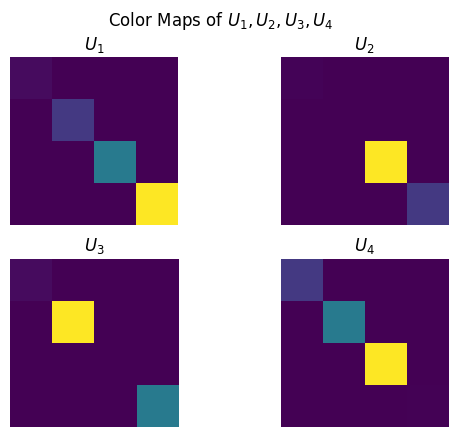

In [6]:
# assignm the numerical value to each element to U1, U2, U3, U4
U1=np.zeros((len(B),len(B)))
U2=np.zeros((len(B),len(B)))
U3=np.zeros((len(B),len(B)))
U4=np.zeros((len(B),len(B)))
for i in range(len(B)):
    for j in range(len(B)):
        if i==j: 
            U1[i][j]=B[j][0] 
            U2[i][j]=B[j][1] 
            U3[i][j]=B[j][2] 
            U4[i][j]=B[j][3]
print("U1 = \n"+np.array2string(U1)+"\n") 
print("U2 = \n"+np.array2string(U2)+"\n") 
print("U3 = \n"+np.array2string(U3)+"\n") 
print("U4 = \n"+np.array2string(U4)+"\n")
# plot the color maps of U1, U2, U3, U4
fig, axs = plt.subplots(2, 2)
cmap = plt.get_cmap('viridis')
axs[0, 0].imshow(U1, cmap=cmap)
axs[0, 0].axis('off')
axs[0, 0].set_title('$U_1$')
axs[0, 1].imshow(U2, cmap=cmap)
axs[0, 1].axis('off')
axs[0, 1].set_title('$U_2$')
axs[1, 0].imshow(U3, cmap=cmap)
axs[1, 0].axis('off')
axs[1, 0].set_title('$U_3$')
axs[1, 1].imshow(U4, cmap=cmap)
axs[1, 1].axis('off')
axs[1, 1].set_title('$U_4$')
fig.suptitle('Color Maps of $U_1, U_2, U_3, U_4$')
plt.show()

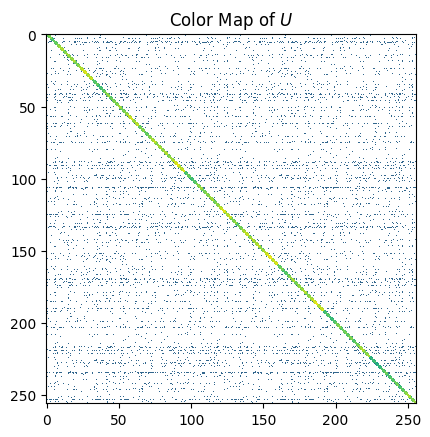

In [7]:
U=U4
U=np.kron(U,U3)
U=np.kron(U,U2)
U=np.kron(U,U1)
norm = colors.LogNorm(vmin=U.min(), vmax=U.max())
plt.imshow(U, cmap=cmap, norm=norm)
plt.title('Color Map of $U$')
plt.show()

In [8]:
def eigenState(path): 
    eigenState=""
    for i in range(len(path)): 
        if i==0:
            eigenState+=format(path[-1]-1,'02b') 
        else:
            eigenState+=format(path[i-1]-1,'02b') 
    return eigenState
eigenState([2,3,4,1])

'00011011'

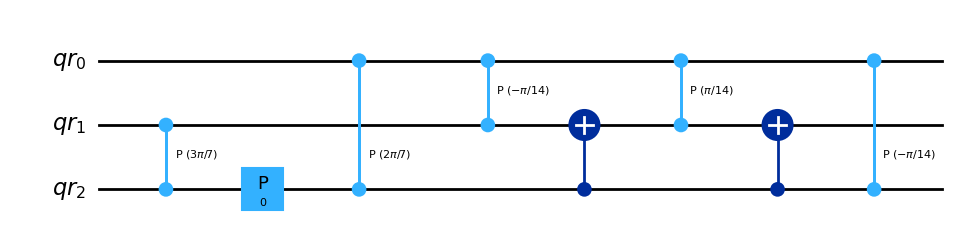

In [9]:
# we treat the bottom qubit as the least important qubit
a=0
b = 10/35*pi 
c = 15/35*pi 
d = 20/35*pi
qr = QuantumRegister(3, 'qr')
qc = QuantumCircuit(qr)
qc.cp(c - a, qr[2], qr[1])
qc.p(a, qr[2])
qc.cp(b - a, qr[2], qr[0])
qc.cp((d - c + a - b)/2, qr[1], qr[0])
qc.cx(qr[2], qr[1])
qc.cp(-(d - c + a - b)/2, qr[1], qr[0])
qc.cx(qr[2], qr[1])
qc.cp((d - c + a - b)/2, qr[2], qr[0])
qc.draw(output='mpl')

In [10]:
def controlled_unitary(qc, qubits: list, phases: list): # phases[0]=a, phases[1]=b, phases[2]=c, phases[3]=d
    qc.cp(phases[2]-phases[0], qubits[0], qubits[1]) # CP(c-a) 
    qc.p(phases[0], qubits[0]) # U1(a) 
    qc.cp(phases[1]-phases[0], qubits[0], qubits[2]) # CP(b-a)
    
    # controlled controlled U1(d-c+a-b) (CCP(d-c+a-b))
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp(-(phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[0], qubits[2])

In [11]:
def U(times, qc, unit, eigen, phases: list): # 0,a,b,c = phases for U1; d,0,e,f = phases for U2; g,h,0,i = phases for U3; j,k,l,0 = phases for U4;␣ ↪m_list=[m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l]
    controlled_unitary(qc, [unit[0] ]+eigen[0:2], [0]+phases[0:3])
    controlled_unitary(qc, [unit[0] ]+eigen[2:4], [phases[3] ]+[0]+phases[4:6])
    controlled_unitary(qc, [unit[0] ]+eigen[4:6], phases[6:8]+[0]+[phases[8] ])
    controlled_unitary(qc, [unit[0] ]+eigen[6:8], phases[9:12]+[0])

In [12]:
def final_U(times, eigen, phases: list): 
    unit = QuantumRegister(1, 'unit')
    qc = QuantumCircuit(unit, eigen)
    for _ in range(2**times):
        U(times, qc, unit, eigen, phases)
    return qc.to_gate(label='U'+'_'+(str(2**times)))

In [13]:
# Storing the eigenvalues in a list
# the number of eigenvalues in a 4-node TSP is (4-1)!/2=3 
eigen_values = ["11000110", "10001101", "11001001"]

# Function to place appropriate corresponding gate according to eigenstates # the parameter 'eigen' is one of the element in the eigen_values array
def eigenstates(qc, eigen, index):
    for i in range(0, len(eigen)):
        if eigen_values[index][i] == '1':
            qc.x(eigen[i])
        if eigen_values[index][i] == '0':
            pass
    qc.barrier() 
    return qc

In [14]:
# Initialization
unit = QuantumRegister(6, 'unit')
eigen = QuantumRegister(8, 'eigen')
unit_classical = ClassicalRegister(6, 'unit_classical') 
qc = QuantumCircuit(unit, eigen, unit_classical)
#

# Setting one eigenstate
# Playing with the first eigenstate here i.e. 11000110 from eigen_values list. 
# (Try to play with other eigenstates from the eigen_values list) 
eigenstates(qc, eigen, 0)
#

# Hadamard on the 'unit' qubits
qc.h(unit[:]) 
qc.barrier() 
#

# Controlled Unitary
phases = [10/35, 15/35, 20/35, 10/35, 35/35, 25/35, 15/35, 35/35, 30/35, 20/35, 25/35, 30/35] # a, b, c, d, e, f, g, h, i, j, k, l
for i in range(0, 6):
    qc.append(final_U(i, eigen, phases), [unit[5-i] ] + eigen[:])
#

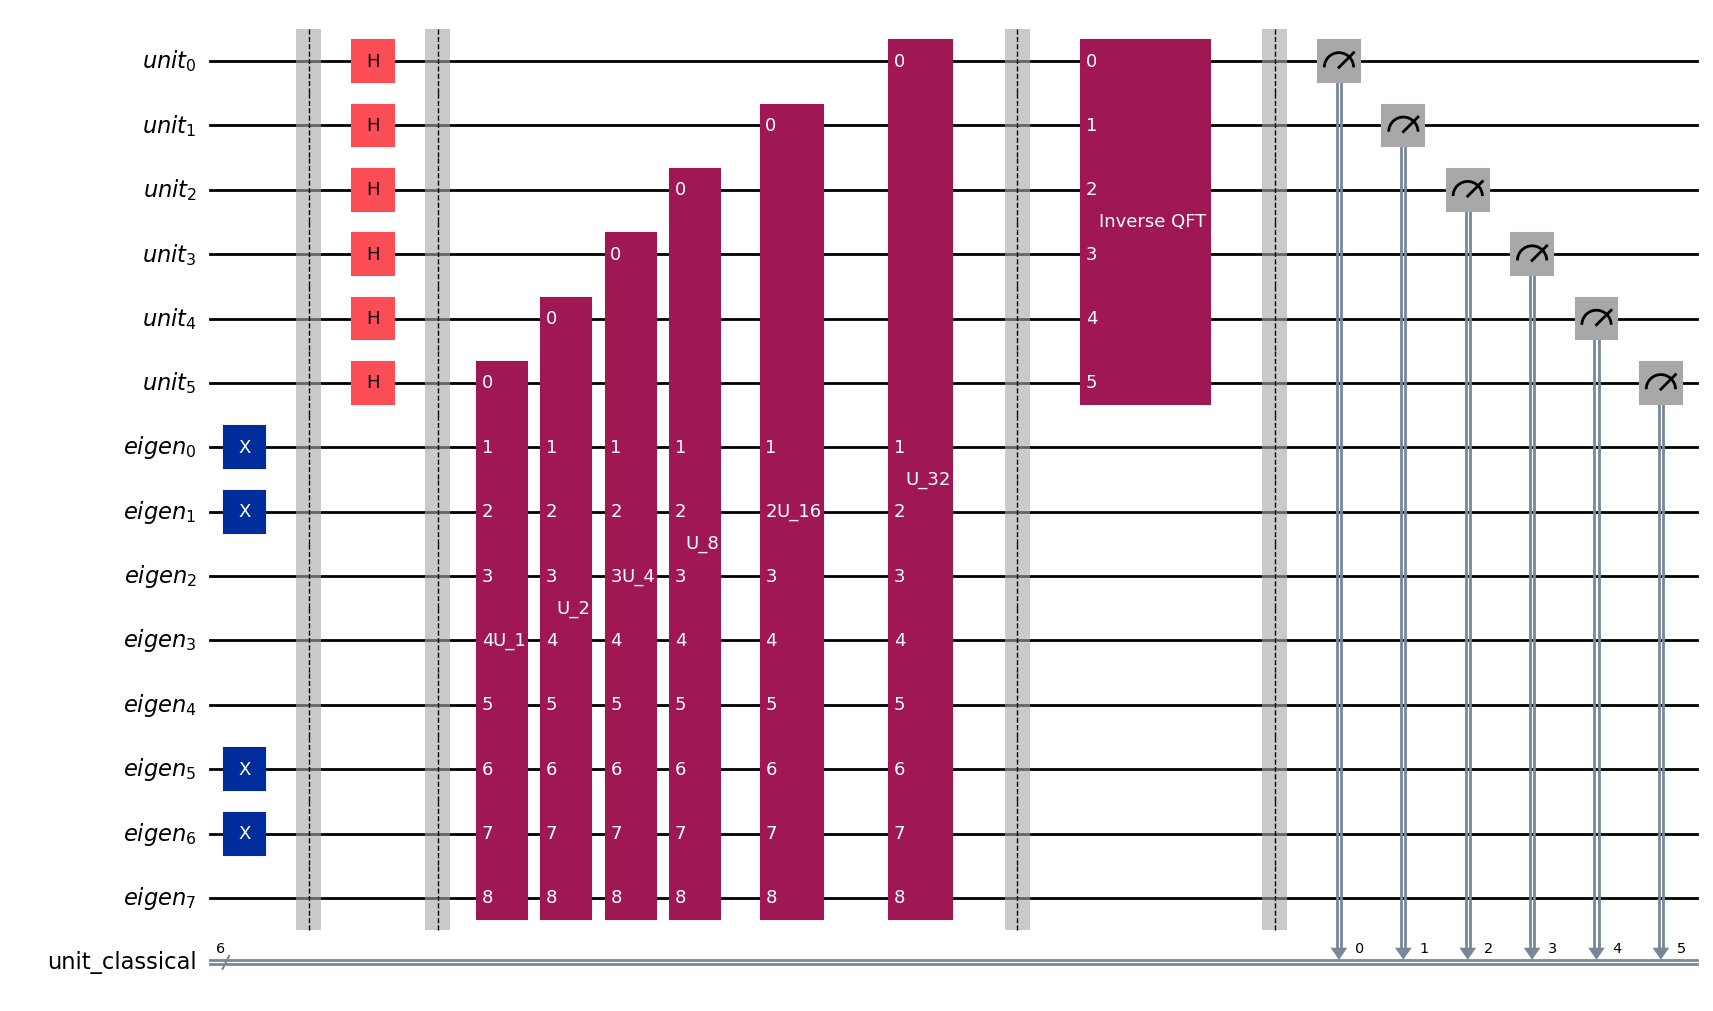

In [15]:
# Inverse QFT
qc.barrier()
qft = QFT(num_qubits=len(unit), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT') 
qc.append(qft, qc.qubits[:len(unit)]) 
qc.barrier()
#
# Measure
qc.measure(unit, unit_classical) #
# Draw
style = {'backgroundcolor': 'white'}
qc.draw('mpl', style=style)

In [16]:
decomposed_circuit = qc.decompose()
decomposed_circuit.draw('mpl',style=style, fold=200, scale=0.7)

In [17]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="enter your token", overwrite=True, set_as_default=True)
service = QiskitRuntimeService(channel="ibm_quantum", token="enter your token")
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)

In [18]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
ansatz_isa = pm.run(qc)

In [ ]:
job = backend.run(transpile(ansatz_isa, backend), shots=8192)
result = job.result()
counts = result.get_counts()

In [ ]:
print(counts)
plot_histogram(counts, figsize=(18.5, 10.5), color='midnightblue')

{'101001': 1, '111111': 3, '110100': 1, '001110': 4, '010010': 7, '001101': 2, '100101': 5, '000001': 2, '101110': 2, '101100': 3, '100111': 4, '100001': 25, '111001': 2, '111011': 3, '010011': 8, '101010': 9, '100000': 37, '111110': 2, '111010': 4, '001000': 4, '111100': 1, '111101': 1, '100010': 18, '000100': 4, '000101': 1, '011101': 357, '110001': 4, '000000': 3, '001001': 4, '011011': 1602, '001011': 3, '010111': 30, '010110': 22, '010001': 8, '110010': 2, '101011': 4, '000111': 4, '010100': 12, '100100': 11, '011000': 60, '000010': 3, '000011': 2, '101101': 4, '110000': 2, '110111': 1, '011001': 80, '100110': 6, '010000': 5, '000110': 3, '100011': 11, '011111': 66, '010101': 17, '011010': 220, '011110': 117, '001100': 1, '101000': 6, '001010': 3, '110101': 2, '001111': 4, '110110': 2, '101111': 3, '011100': 5355}


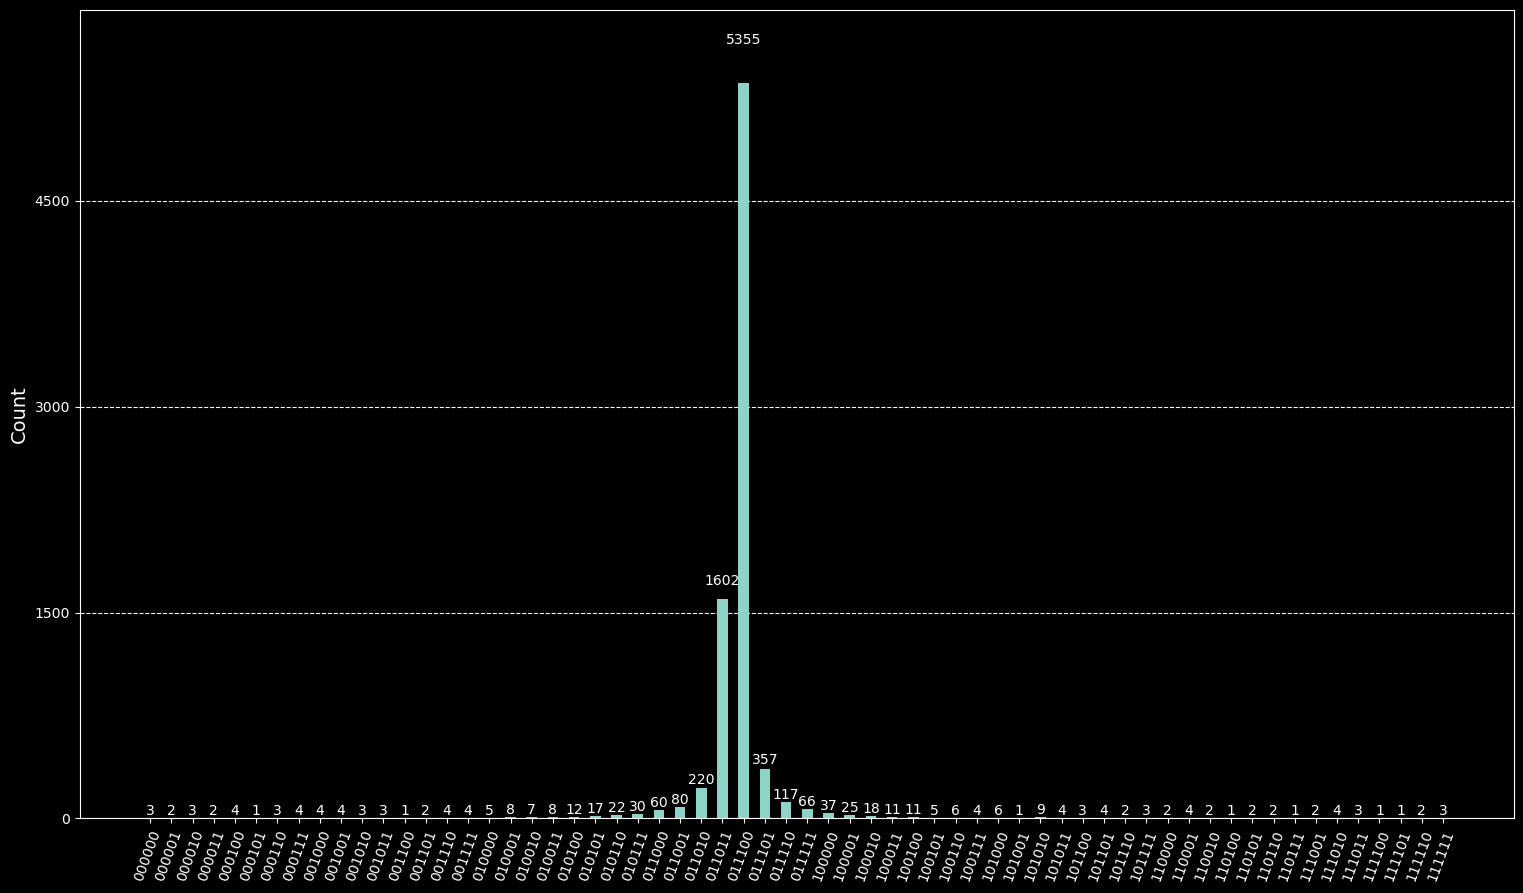

In [139]:
aer_sim = qiskit_aer.Aer.get_backend('qasm_simulator')
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
ansatz_isa = pm.run(qc)
job2 = backend.run(transpile(ansatz_isa, backend), shots=8192)
result2 = job.result()
counts2 = result.get_counts()
print(counts2)
plot_histogram(counts2, figsize=(18.5, 10.5))